Stroke Risk Prediction Using XG Boost

In [78]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc, f1_score, roc_curve, roc_auc_score
from tensorflow.keras.metrics import Precision, Recall, AUC

In [50]:
path = kagglehub.dataset_download("mahatiratusher/stroke-risk-prediction-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/stroke-risk-prediction-dataset


In [51]:
df = pd.read_csv("/kaggle/input/stroke-risk-prediction-dataset/stroke_risk_dataset.csv")
df.sample(5)

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
68240,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,58,50.0,1
36381,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,88,95.0,1
61280,1,0,1,1,0,0,1,1,1,1,0,1,0,0,0,30,46.0,0
36781,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,47,39.5,0
15976,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,72,57.0,1


In [52]:
df.shape

(70000, 18)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

In [54]:
df.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


In [55]:
print(df.duplicated().sum())

1021


In [56]:
print(df.isnull().sum())

Chest Pain                        0
Shortness of Breath               0
Irregular Heartbeat               0
Fatigue & Weakness                0
Dizziness                         0
Swelling (Edema)                  0
Pain in Neck/Jaw/Shoulder/Back    0
Excessive Sweating                0
Persistent Cough                  0
Nausea/Vomiting                   0
High Blood Pressure               0
Chest Discomfort (Activity)       0
Cold Hands/Feet                   0
Snoring/Sleep Apnea               0
Anxiety/Feeling of Doom           0
Age                               0
Stroke Risk (%)                   0
At Risk (Binary)                  0
dtype: int64


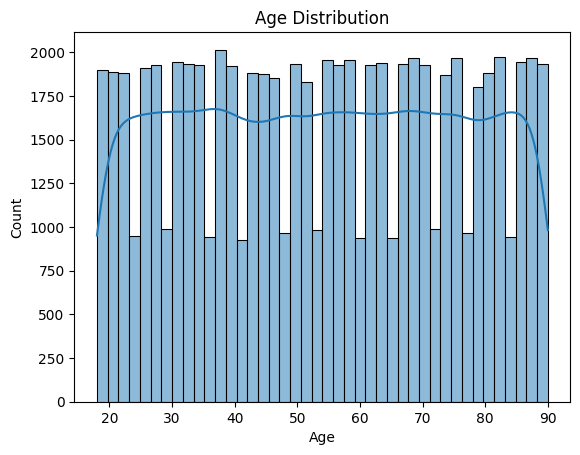

In [57]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

<ipython-input-58-d088612b7202>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['At Risk (Binary)'], palette=['#66c2a5', '#fc8d62'])


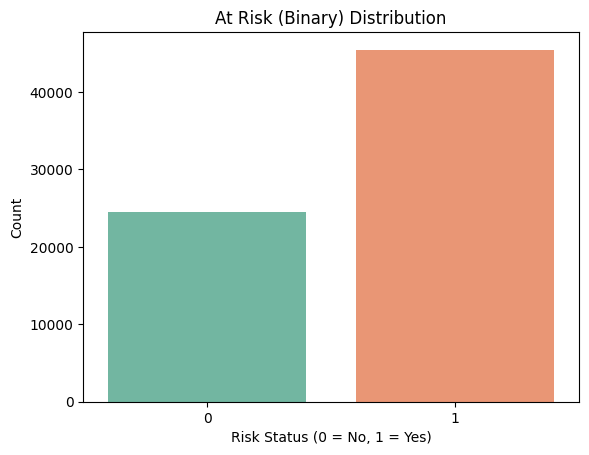

In [58]:
sns.countplot(x=df['At Risk (Binary)'], palette=['#66c2a5', '#fc8d62'])
plt.title('At Risk (Binary) Distribution')
plt.xlabel('Risk Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

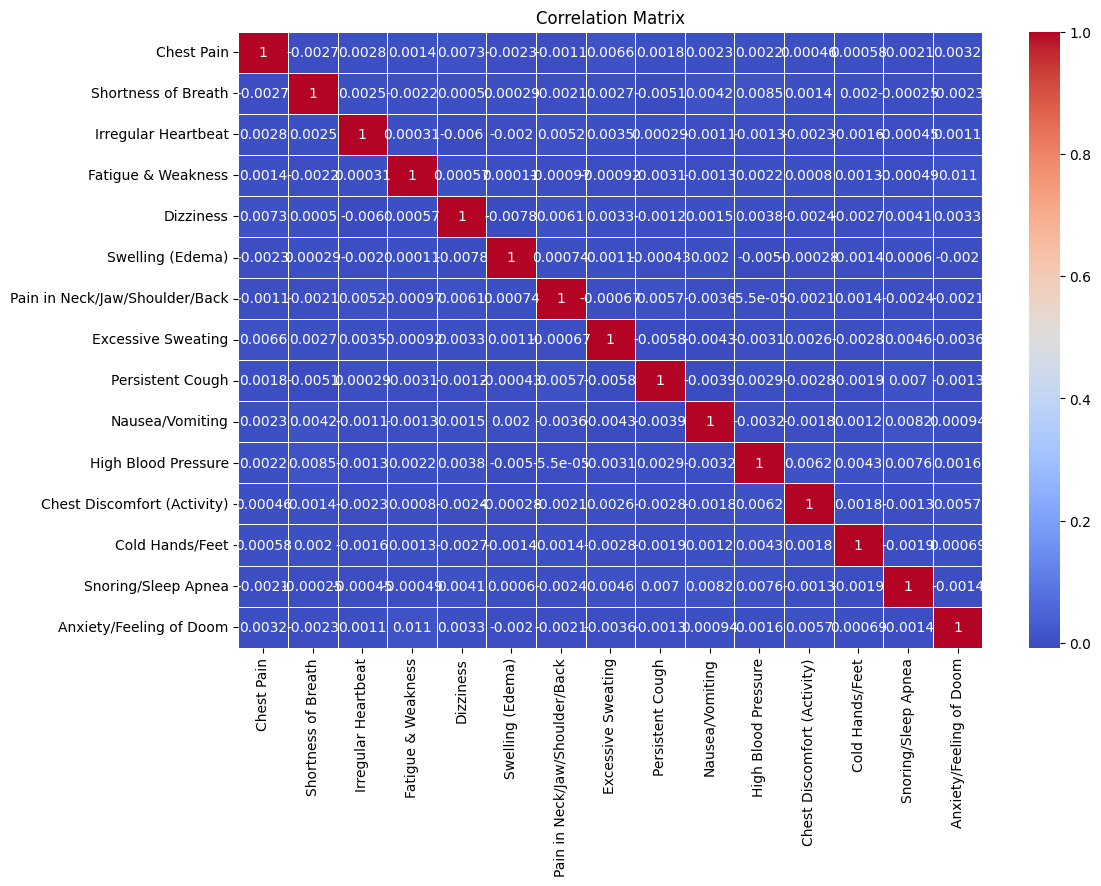

In [59]:
excluded_columns = ['Age', 'At Risk (Binary)', 'Stroke Risk (%)']
df_filtered = df.drop(columns=excluded_columns, errors='ignore')

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [60]:
df.drop_duplicates(inplace=True)

In [61]:
df.drop(columns=['Stroke Risk (%)'],inplace=True)

In [62]:
X = df.drop(columns=['At Risk (Binary)'])
y = df['At Risk (Binary)']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Before balance:
At Risk (Binary)
1    35769
0    19414
Name: count, dtype: int64


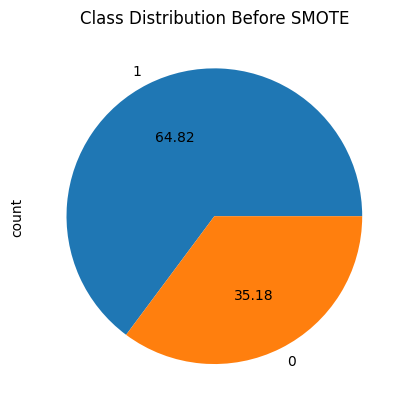


After balance:
At Risk (Binary)
0    35769
1    35769
Name: count, dtype: int64


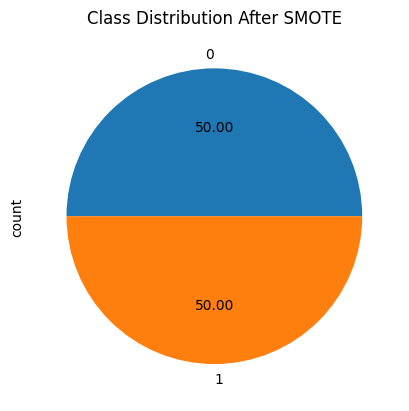

In [64]:
# Balance the imbalance dataset using SMOTE
print('Before balance:')
print(y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution Before SMOTE')
plt.show()

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('\nAfter balance:')
print(y_train_sm.value_counts())
y_train_sm.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution After SMOTE')
plt.show()

In [65]:
# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300]
}

# Create an instance of XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state = 42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='average_precision')

# Fit the data to perform the search
grid_search.fit(X_train_sm, y_train_sm)

# Access the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Best score:  0.9999784808620109


In [66]:
# Fit model based on the parameters that we gave from GridSearchCV
# Create an instance of XGBClassifier

xgboost_model = XGBClassifier(objective='binary:logistic',
                              n_estimators=300,
                              max_depth=10,
                              learning_rate=0.1,
                              random_state=42)

# Fit the data to train the XGBoost model
xgboost_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [67]:
# Make predictions on the test data
y_pred = xgboost_model.predict(X_test)

In [68]:
# Predict the test dataset and check the accuracy
print(f'Classification Report \n\n{classification_report(y_test, y_pred)}')

Classification Report 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4783
           1       0.98      0.99      0.99      9013

    accuracy                           0.98     13796
   macro avg       0.98      0.98      0.98     13796
weighted avg       0.98      0.98      0.98     13796



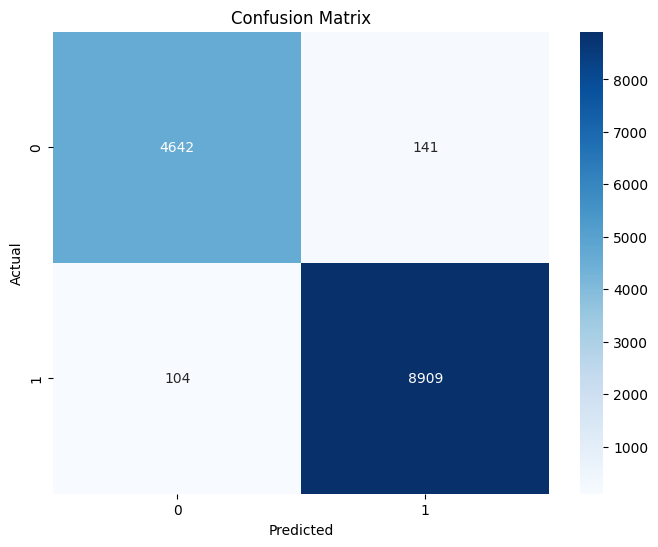

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

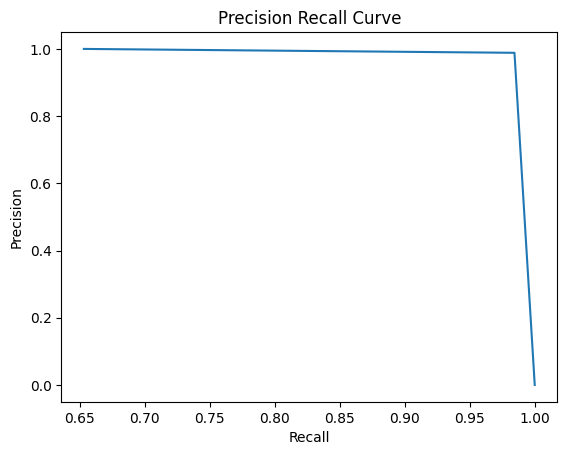

In [70]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_precision,lr_recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve')
plt.show()

In [72]:
# Calculate AUC-PR curve
auc_pr = auc(lr_recall, lr_precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.9902097090813557


In [73]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train_sm, xgboost_model.predict(X_train_sm)):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(y_test, y_pred):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9822


In [74]:
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1: .4f}. ')

f1-score :  0.9864. 


In [79]:
# Calculate the true positive rate (TPR), false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

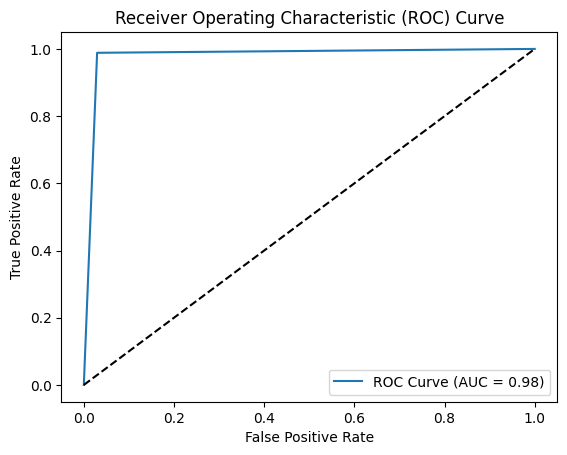

In [80]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()